# Project PCD

## Kelompok ..
`Nama Kelompok:`

In [9]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np
import seaborn as sns
from glob import glob
from albumentations import (
    Compose, HorizontalFlip, RandomBrightnessContrast,
    HueSaturationValue
)
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pywt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd


### EDA

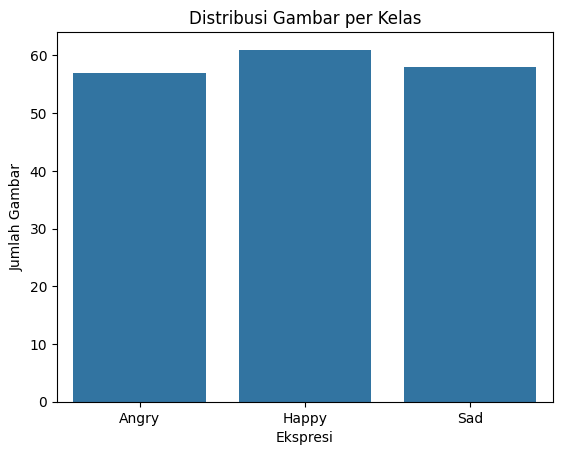

In [2]:
DATASET_PATH = 'archive (9)/data'

labels = os.listdir(DATASET_PATH)
data_count = {}

for label in labels:
    folder_path = os.path.join(DATASET_PATH, label)
    images = glob(os.path.join(folder_path, '*.jpg'))
    data_count[label] = len(images)

# Visualisasi distribusi
sns.barplot(x=list(data_count.keys()), y=list(data_count.values()))
plt.title("Distribusi Gambar per Kelas")
plt.xlabel("Ekspresi")
plt.ylabel("Jumlah Gambar")
plt.show()


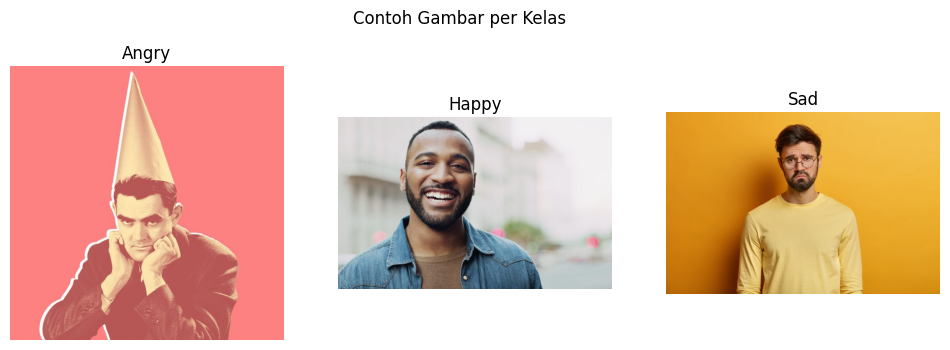

In [3]:
def load_image(path):
    img = cv2.imread(path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 4))
for i, label in enumerate(labels):
    img_path = glob(os.path.join(DATASET_PATH, label, '*.jpg'))[0]
    img = load_image(img_path)
    plt.subplot(1, 3, i+1)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
plt.suptitle("Contoh Gambar per Kelas")
plt.show()


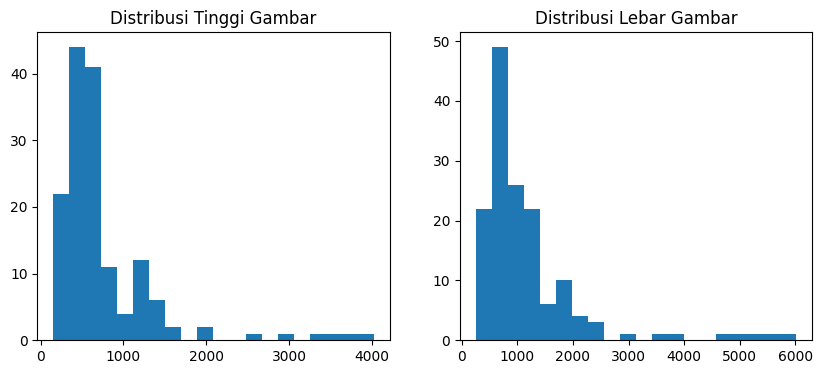

In [4]:
import os
import cv2
import matplotlib.pyplot as plt
from glob import glob

DATASET_PATH = 'archive (9)/data'
labels = os.listdir(DATASET_PATH)
img_shapes = []

for label in labels:
    img_paths = glob(os.path.join(DATASET_PATH, label, '*.jpg'))
    for path in img_paths[:50]:  
        img = cv2.imread(path)
        h, w, _ = img.shape
        img_shapes.append((h, w))

heights = [s[0] for s in img_shapes]
widths = [s[1] for s in img_shapes]

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(heights, bins=20)
plt.title('Distribusi Tinggi Gambar')

plt.subplot(1,2,2)
plt.hist(widths, bins=20)
plt.title('Distribusi Lebar Gambar')
plt.show()


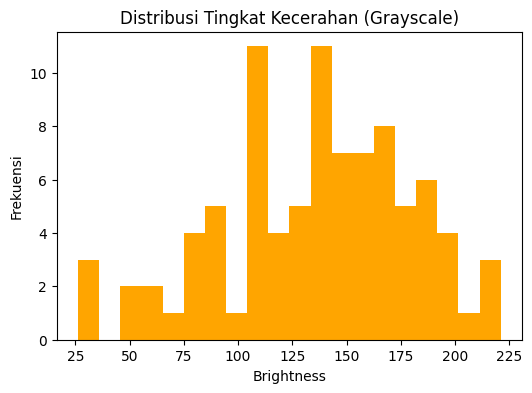

In [5]:
import numpy as np

brightness_list = []

for label in labels:
    img_paths = glob(os.path.join(DATASET_PATH, label, '*.jpg'))
    for path in img_paths[:30]:  
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        brightness_list.append(np.mean(img))

plt.figure(figsize=(6,4))
plt.hist(brightness_list, bins=20, color='orange')
plt.title('Distribusi Tingkat Kecerahan (Grayscale)')
plt.xlabel('Brightness')
plt.ylabel('Frekuensi')
plt.show()


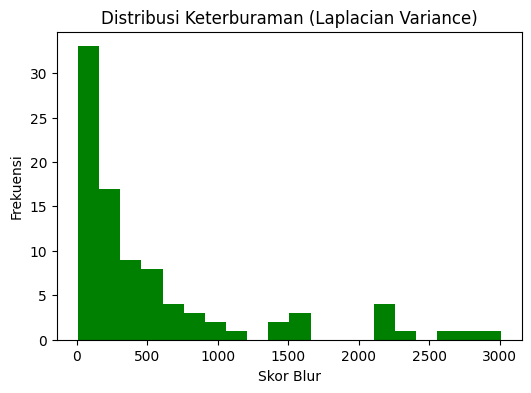

In [6]:
from skimage.filters import laplace
from skimage.io import imread

blur_scores = []

for label in labels:
    img_paths = glob(os.path.join(DATASET_PATH, label, '*.jpg'))
    for path in img_paths[:30]:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        blur = cv2.Laplacian(img, cv2.CV_64F).var()
        blur_scores.append(blur)

plt.figure(figsize=(6,4))
plt.hist(blur_scores, bins=20, color='green')
plt.title('Distribusi Keterburaman (Laplacian Variance)')
plt.xlabel('Skor Blur')
plt.ylabel('Frekuensi')
plt.show()


#### Distribusi color

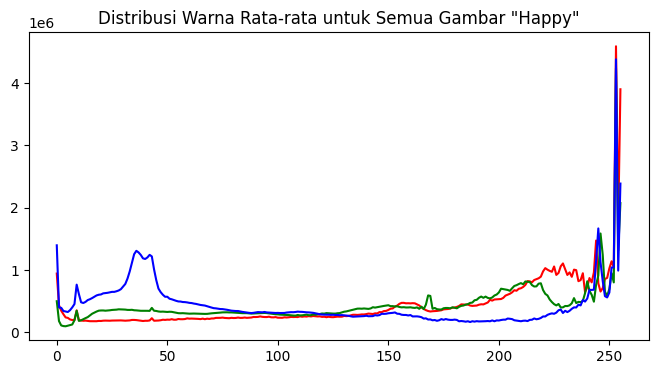

In [9]:
sample_paths = glob(os.path.join(DATASET_PATH, 'Happy', '*.jpg'))

hist_r_h = np.zeros((256,))
hist_g_h = np.zeros((256,))
hist_b_h = np.zeros((256,))

for path in sample_paths:
    img = cv2.imread(path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    hist_r_h += cv2.calcHist([img_rgb], [0], None, [256], [0, 256]).flatten()
    hist_g_h += cv2.calcHist([img_rgb], [1], None, [256], [0, 256]).flatten()
    hist_b_h += cv2.calcHist([img_rgb], [2], None, [256], [0, 256]).flatten()

plt.figure(figsize=(8,4))
plt.plot(hist_r_h, color='r')
plt.plot(hist_g_h, color='g')
plt.plot(hist_b_h, color='b')
plt.title('Distribusi Warna Rata-rata untuk Semua Gambar "Happy"')
plt.show()

In [14]:
np.sum(hist_r_h), np.sum(hist_g_h), np.sum(hist_b_h)


(112542156.0, 112542156.0, 112542156.0)

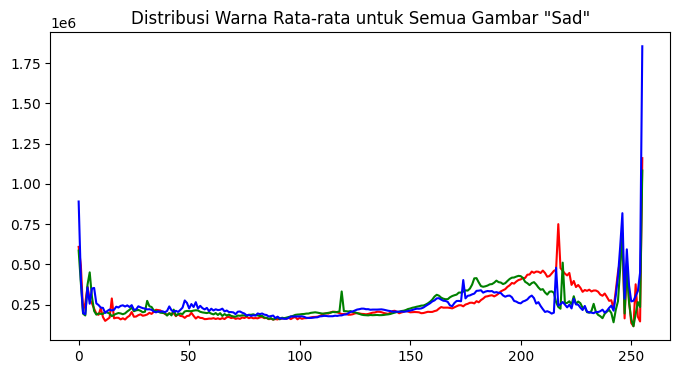

In [10]:
sample_paths = glob(os.path.join(DATASET_PATH, 'Sad', '*.jpg'))

hist_r_s = np.zeros((256,))
hist_g_s = np.zeros((256,))
hist_b_s = np.zeros((256,))

for path in sample_paths:
    img = cv2.imread(path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    hist_r_s += cv2.calcHist([img_rgb], [0], None, [256], [0, 256]).flatten()
    hist_g_s += cv2.calcHist([img_rgb], [1], None, [256], [0, 256]).flatten()
    hist_b_s += cv2.calcHist([img_rgb], [2], None, [256], [0, 256]).flatten()

plt.figure(figsize=(8,4))
plt.plot(hist_r_s, color='r')
plt.plot(hist_g_s, color='g')
plt.plot(hist_b_s, color='b')
plt.title('Distribusi Warna Rata-rata untuk Semua Gambar "Sad"')
plt.show()

In [13]:
np.sum(hist_r_s), np.sum(hist_g_s), np.sum(hist_b_s)


(63897750.0, 63897750.0, 63897750.0)

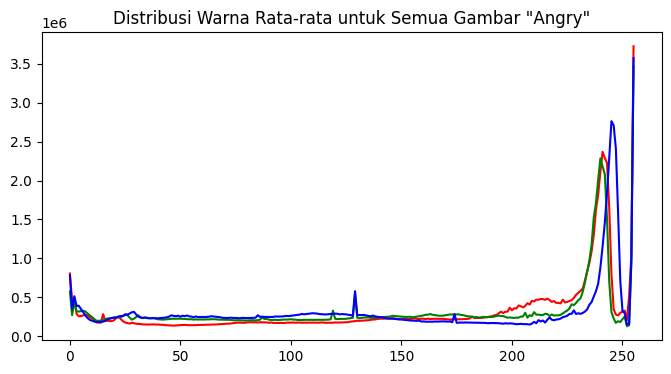

In [11]:
sample_paths = glob(os.path.join(DATASET_PATH, 'Angry', '*.jpg'))

hist_r_A = np.zeros((256,))
hist_g_A = np.zeros((256,))
hist_b_A = np.zeros((256,))

for path in sample_paths:
    img = cv2.imread(path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    hist_r_A += cv2.calcHist([img_rgb], [0], None, [256], [0, 256]).flatten()
    hist_g_A += cv2.calcHist([img_rgb], [1], None, [256], [0, 256]).flatten()
    hist_b_A += cv2.calcHist([img_rgb], [2], None, [256], [0, 256]).flatten()

plt.figure(figsize=(8,4))
plt.plot(hist_r_A, color='r')
plt.plot(hist_g_A, color='g')
plt.plot(hist_b_A, color='b')
plt.title('Distribusi Warna Rata-rata untuk Semua Gambar "Angry"')
plt.show()

In [12]:
np.sum(hist_r_A), np.sum(hist_g_A), np.sum(hist_b_A)


(82625257.0, 82625257.0, 82625257.0)

In [27]:
! pip install dask


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 19.5 MB/s eta 0:00:00


[########################################] | 100% Completed | 3.09 ss


<Figure size 600x500 with 0 Axes>

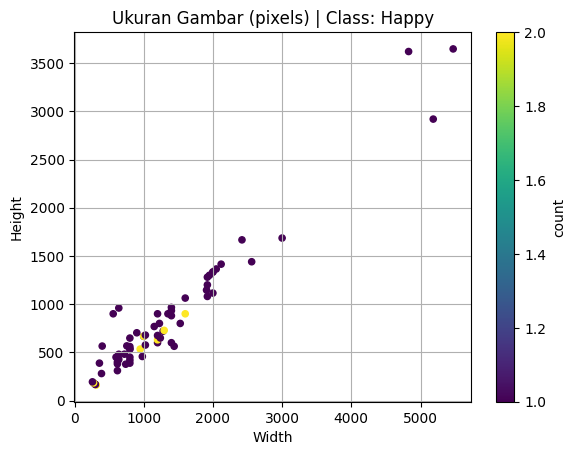

[########################################] | 100% Completed | 2.17 ss


<Figure size 600x500 with 0 Axes>

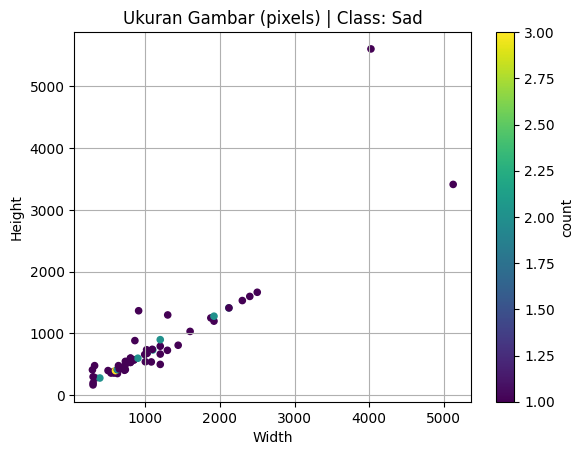

[########################################] | 100% Completed | 2.29 ss


<Figure size 600x500 with 0 Axes>

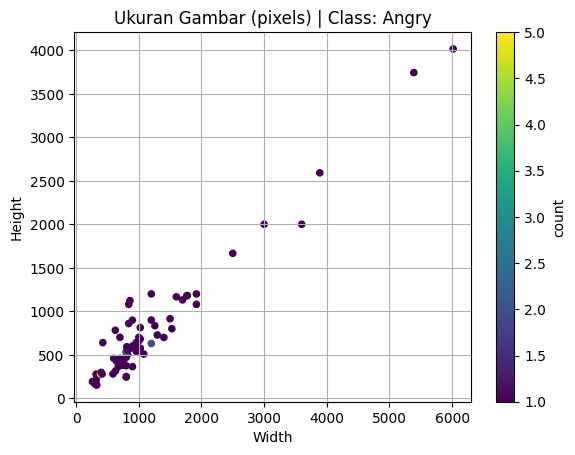

In [29]:
import os
import dask.bag as db
from dask.diagnostics import ProgressBar
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

# Fungsi untuk mengambil dimensi gambar
def get_dims(path):
    try:
        with Image.open(path) as img:
            return img.size[::-1]  # (height, width)
    except:
        return (None, None)  # Handle gambar corrupt

base_path = 'archive (9)/data'

# Dictionary berisi 3 kelas
directories = {
    "Happy": os.path.join(base_path, "Happy/"),
    "Sad": os.path.join(base_path, "Sad/"),
    "Angry": os.path.join(base_path, "Angry/")
}

# Loop untuk setiap kelas
for class_name, folder_path in directories.items():
    # Ambil semua path gambar
    filelist = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
    
    # Gunakan Dask untuk ambil ukuran
    dims = db.from_sequence(filelist).map(get_dims)
    
    with ProgressBar():
        dims = dims.compute()
    
    # Buat DataFrame dari ukuran
    dim_df = pd.DataFrame(dims, columns=['height', 'width'])
    dim_df = dim_df.dropna()  # Buang hasil yang error/corrupt
    
    # Hitung frekuensi ukuran unik
    sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
    
    # Plot scatter
    plt.figure(figsize=(6, 5))
    sizes.plot.scatter(x='width', y='height', c='count', cmap='viridis', colorbar=True)
    plt.title(f'Ukuran Gambar (pixels) | Class: {class_name}')
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.grid(True)
    plt.show()


### Segmentasi dan crop

#### Segmentasi haar casade

In [4]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
def crop_image_roi(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    if len(faces) == 0:
        return [image]  

    crops = []
    for (x, y, w, h) in faces:
        pad = 10
        x = max(0, x - pad)
        y = max(0, y - pad)
        w = min(image.shape[1] - x, w + 2 * pad)
        h = min(image.shape[0] - y, h + 2 * pad)
        crop = image[y:y+h, x:x+w]
        crops.append(crop)
    return crops
def extract_frames_from_gif(gif_path):
    frames = []
    try:
        gif = Image.open(gif_path)
        for frame_index in range(0, gif.n_frames):
            gif.seek(frame_index)
            frame = gif.convert('RGB')
            frame_array = np.array(frame)
            frame_bgr = cv2.cvtColor(frame_array, cv2.COLOR_RGB2BGR)  
            frames.append(frame_bgr)
    except Exception as e:
        print(f"Error reading GIF {gif_path}: {e}")
    return frames

#### adaptive threhold

In [3]:
import cv2
import numpy as np

def crop_with_adaptive_threshold(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Adaptive Threshold
    thresh = cv2.adaptiveThreshold(
        blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY_INV, 11, 2
    )

    # Hitung integral image (untuk referensi)
    integral_image = cv2.integral(blur)

    # Temukan kontur dari hasil threshold
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    crops = []
    for contour in contours:
        if cv2.contourArea(contour) < 500:  # filter noise kecil
            continue
        x, y, w, h = cv2.boundingRect(contour)

        # Tambahkan padding (opsional)
        pad = 10
        x = max(0, x - pad)
        y = max(0, y - pad)
        w = min(image.shape[1] - x, w + 2 * pad)
        h = min(image.shape[0] - y, h + 2 * pad)

        crop = image[y:y+h, x:x+w]
        crops.append(crop)

    return crops, thresh, integral_image


# Load gambar
img = cv2.imread(r'C:\project_smt 4\PCD\face emotion\archive (9)\data\Angry\Angry-people-2.jpg')

# Proses crop
crops, threshold_result, integral_img = crop_with_adaptive_threshold(img)

# Simpan hasil crop
for i, wajah in enumerate(crops):
    cv2.imwrite(f'wajah_adaptive_{i}.jpg', wajah)

# (Opsional) Simpan hasil threshold & integral image visual
cv2.imwrite("adaptive_thresh_result.jpg", threshold_result)

# Integral image di-normalisasi agar bisa disimpan sebagai gambar (visualisasi saja)
norm_integral = cv2.normalize(integral_img, None, 0, 255, cv2.NORM_MINMAX)
norm_integral = norm_integral.astype(np.uint8)
cv2.imwrite("integral_image.jpg", norm_integral)


True

#### K-Means segementasi

In [4]:
import cv2
import numpy as np

def crop_face_kmeans(image, K=3):
    img = image.copy()
    Z = img.reshape((-1, 3))
    Z = np.float32(Z)

    # KMeans criteria dan clustering
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Rekonstruksi gambar hasil segmentasi
    center = np.uint8(center)
    segmented_img = center[label.flatten()]
    segmented_img = segmented_img.reshape((img.shape))

    # Ubah ke grayscale untuk thresholding
    gray_segmented = cv2.cvtColor(segmented_img, cv2.COLOR_BGR2GRAY)

    # Threshold untuk ambil klaster tertentu
    _, mask = cv2.threshold(gray_segmented, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Temukan kontur area hasil segmentasi
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    crops = []
    for cnt in contours:
        if cv2.contourArea(cnt) < 1000:  # filter kontur kecil
            continue
        x, y, w, h = cv2.boundingRect(cnt)
        face_crop = img[y:y+h, x:x+w]
        crops.append(face_crop)

    return crops, segmented_img, mask

# Contoh penggunaan
img_path = r'C:\project_smt 4\PCD\face emotion\archive (9)\data\Angry\Angry-people-2.jpg'
img = cv2.imread(img_path)

crops, segmented_img, mask = crop_face_kmeans(img, K=3)

# Simpan hasil
for i, crop in enumerate(crops):
    cv2.imwrite(f'wajah_kmeans_{i}.jpg', crop)

cv2.imwrite('kmeans_segmented.jpg', segmented_img)
cv2.imwrite('kmeans_mask.jpg', mask)


True

`metode segmentasi menunjukan bahwa mengunakan metode Haar Casade yang medeteksi wajah lebih bagus `

### Segmentasi dan Labeling

In [5]:
input_dir = r'C:\project_smt 4\PCD\face emotion\archive (9)\data'
dataset = []  

for label in os.listdir(input_dir):
    label_path = os.path.join(input_dir, label)
    if not os.path.isdir(label_path):
        continue

    for filename in os.listdir(label_path):
        file_path = os.path.join(label_path, filename)

        if filename.lower().endswith('.gif'):
            print(1)
            frames = extract_frames_from_gif(file_path)
            for frame in frames:
                crops = crop_image_roi(frame)
                for crop in crops:
                    dataset.append({'label': label, 'image': crop})
        else:
            image = cv2.imread(file_path)
            if image is None:
                print(f"Gagal membaca gambar: {file_path}")
                continue
            crops = crop_image_roi(image)
            for crop in crops:
                dataset.append({'label': label, 'image': crop})


1


In [7]:
print(len(dataset))

510


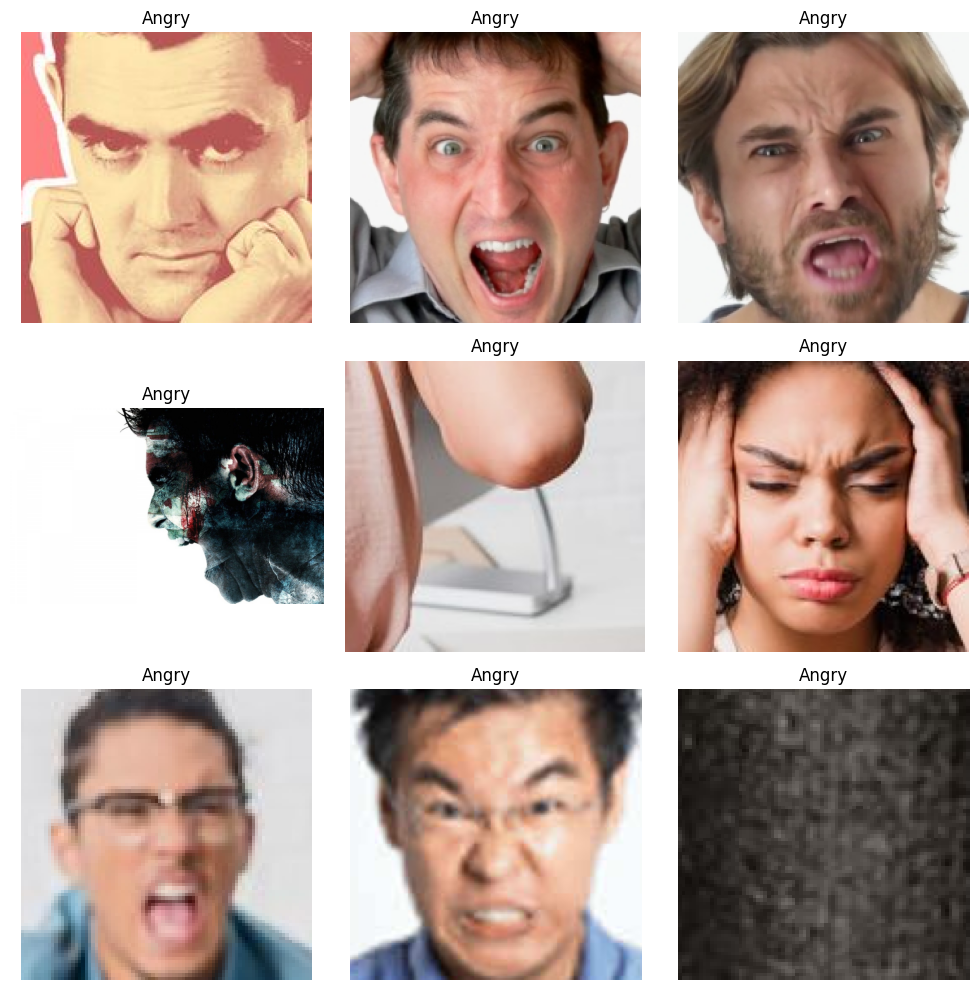

In [8]:
def show_sample_images(dataset, num_samples=12):
    plt.figure(figsize=(10, 10))
    for i in range(min(num_samples, len(dataset))):
        data = dataset[i]
        image = cv2.cvtColor(data['image'], cv2.COLOR_BGR2RGB) 
        label = data['label']
        plt.subplot(3, 3, i+1)
        plt.imshow(image)
        plt.title(label)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Tampilkan 9 gambar pertama
show_sample_images(dataset, num_samples=9)

### Resize

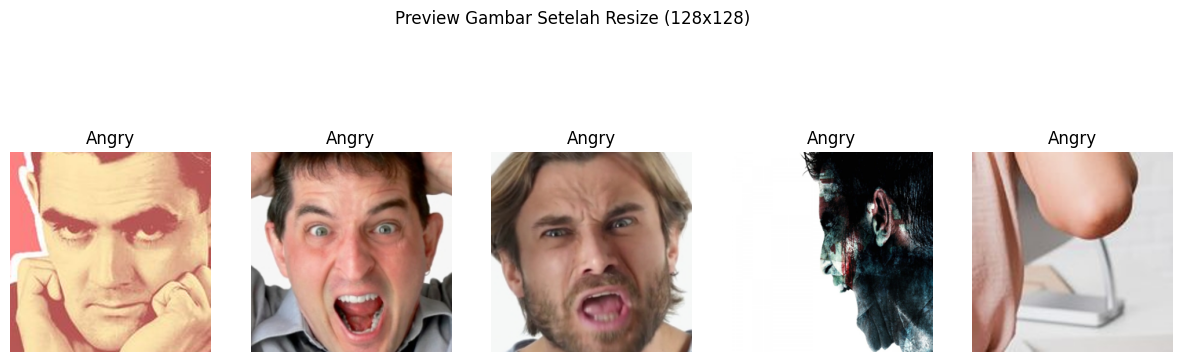

In [6]:
target_size = (256, 256)
resized_images = []
labels = []

for data in dataset:
    img_array = data.get('image')
    label = data.get('label')

    if img_array is None or label is None:
        print("⚠ Data tidak memiliki 'image' atau 'label'. Lewati.")
        continue

    try:
        img_pil = Image.fromarray(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        img_resized = img_pil.resize(target_size)
        
        resized_images.append(img_resized)
        labels.append(label)
    except Exception as e:
        print(f"⚠ Gagal memproses gambar: {e}")

num_preview = min(5, len(resized_images))
if num_preview > 0:
    fig, axes = plt.subplots(1, num_preview, figsize=(15, 5))

    for ax, img, label in zip(axes, resized_images[:num_preview], labels[:num_preview]):
        ax.imshow(img)
        ax.set_title(label)
        ax.axis("off")

    plt.suptitle("Preview Gambar Setelah Resize (128x128)")
    plt.show()
else:
    print("⚠ Tidak ada gambar untuk ditampilkan.")

### Grayscale

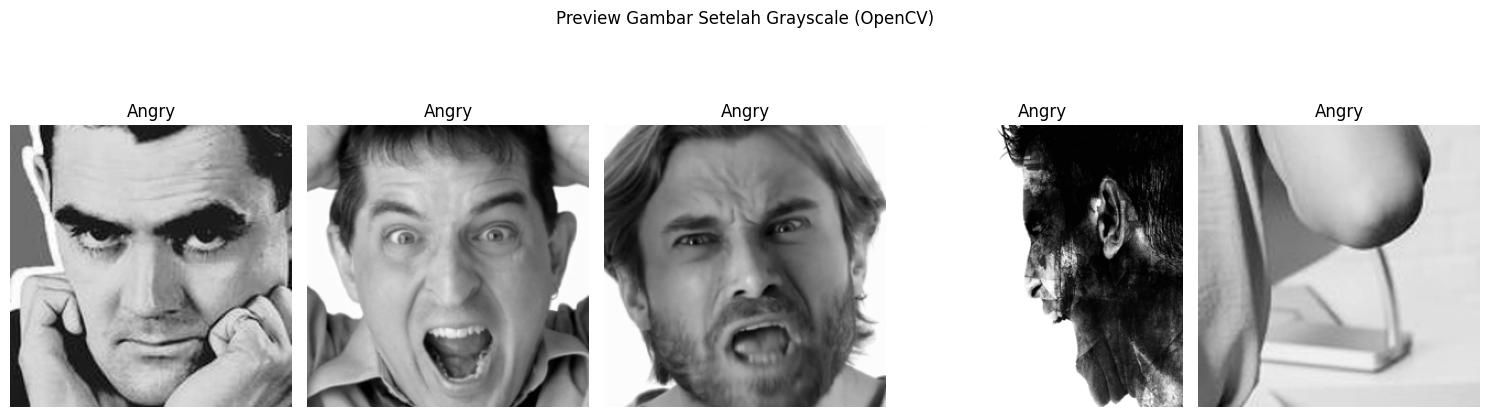

In [7]:
grayscale_images = []

for img in resized_images:
    img_np = np.array(img)  
    img_gray = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY) 
    grayscale_images.append(img_gray)

fig, axes = plt.subplots(1, min(5, len(grayscale_images)), figsize=(15, 5))
for ax, img, label in zip(axes, grayscale_images[:5], labels[:5]):
    ax.imshow(img, cmap='gray')
    ax.set_title(label)
    ax.axis("off")

plt.suptitle("Preview Gambar Setelah Grayscale (OpenCV)")
plt.tight_layout()
plt.show()

In [180]:
print("Jumlah resized images:", len(resized_images))
print("Jumlah grayscale images:", len(grayscale_images))
print("Jumlah labels:", len(labels))

Jumlah resized images: 510
Jumlah grayscale images: 510
Jumlah labels: 510


### Augmentasi 

`Augmentasi mengunakan library`

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

X_gray = np.array([np.expand_dims(img, axis=-1) for img in grayscale_images])

datagen = ImageDataGenerator(
    rotation_range=20,
    # width_shift_range=0.1,
    # height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='constant'
)

augmented_images = []
augmented_labels = []

for img, label in zip(X_gray, labels):
    augmented_images.append(img)
    augmented_labels.append(label)
    
    img_batch = np.expand_dims(img, axis=0)
    gen = datagen.flow(img_batch, batch_size=1)

    for _ in range(4):
        aug_img = next(gen)[0].astype(np.uint8)
        augmented_images.append(aug_img)
        augmented_labels.append(label)

X_combined = np.array(augmented_images)
y_combined = augmented_labels

print("Jumlah total gambar (termasuk asli dan augmentasi):", len(X_combined))
print("Jumlah total label :", len(y_combined))



Jumlah total gambar (termasuk asli dan augmentasi): 2550
Jumlah total label : 2550


`Augmentasi tidak mengunakan library`

In [ ]:
import cv2
import numpy as np

def rotate_image(image, angle):
    """Rotasi gambar dengan sudut tertentu (derajat)."""
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), borderMode=cv2.BORDER_CONSTANT, borderValue=0)
    return rotated

def shift_image(image, shift_x, shift_y):
    """Geser gambar secara horizontal dan vertikal."""
    M = np.float32([[1, 0, shift_x], [0, 1, shift_y]])
    shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]), borderMode=cv2.BORDER_CONSTANT, borderValue=0)
    return shifted

def zoom_image(image, zoom_factor):
    """Zoom in atau zoom out gambar."""
    if zoom_factor == 1:
        return image.copy()
    
    h, w = image.shape[:2]
    new_h, new_w = int(h * zoom_factor), int(w * zoom_factor)
    
    zoomed = cv2.resize(image, (new_w, new_h))
    
    if zoom_factor < 1:
       
        pad_h = (h - new_h) // 2
        pad_w = (w - new_w) // 2
        canvas = np.zeros_like(image)
        canvas[pad_h:pad_h+new_h, pad_w:pad_w+new_w] = zoomed
        return canvas
    else:
    
        start_h = (new_h - h) // 2
        start_w = (new_w - w) // 2
        cropped = zoomed[start_h:start_h+h, start_w:start_w+w]
        return cropped

def flip_image(image, do_flip):
    """Flip gambar secara horizontal jika do_flip=True."""
    if do_flip:
        return cv2.flip(image, 1)
    else:
        return image

def augment_image(image, angle=0, shift_x=0, shift_y=0, zoom_factor=1.0, do_flip=False):

    augmented = rotate_image(image, angle)
    augmented = shift_image(augmented, shift_x, shift_y)
    augmented = zoom_image(augmented, zoom_factor)
    augmented = flip_image(augmented, do_flip)
    return augmented

augment_params_list = [
    {'angle': 15, 'shift_x': 5, 'shift_y': 0, 'zoom_factor': 1.0, 'do_flip': False},
    {'angle': -10, 'shift_x': 0, 'shift_y': 5, 'zoom_factor': 0.9, 'do_flip': True},
    {'angle': 0, 'shift_x': -5, 'shift_y': -5, 'zoom_factor': 1.1, 'do_flip': False},
]

augmented_images = []
augmented_labels = []

for img, label in zip(grayscale_images, labels):

    augmented_images.append(np.expand_dims(img.astype(np.uint8), axis=-1))
    augmented_labels.append(label)
   
    for params in augment_params_list:
        aug_img = augment_image(
            img,
            angle=params.get('angle', 0),
            shift_x=params.get('shift_x', 0),
            shift_y=params.get('shift_y', 0),
            zoom_factor=params.get('zoom_factor', 1.0),
            do_flip=params.get('do_flip', False)
        )
        augmented_images.append(np.expand_dims(aug_img.astype(np.uint8), axis=-1))
        augmented_labels.append(label)


In [144]:
print(len(augmented_images))

3060


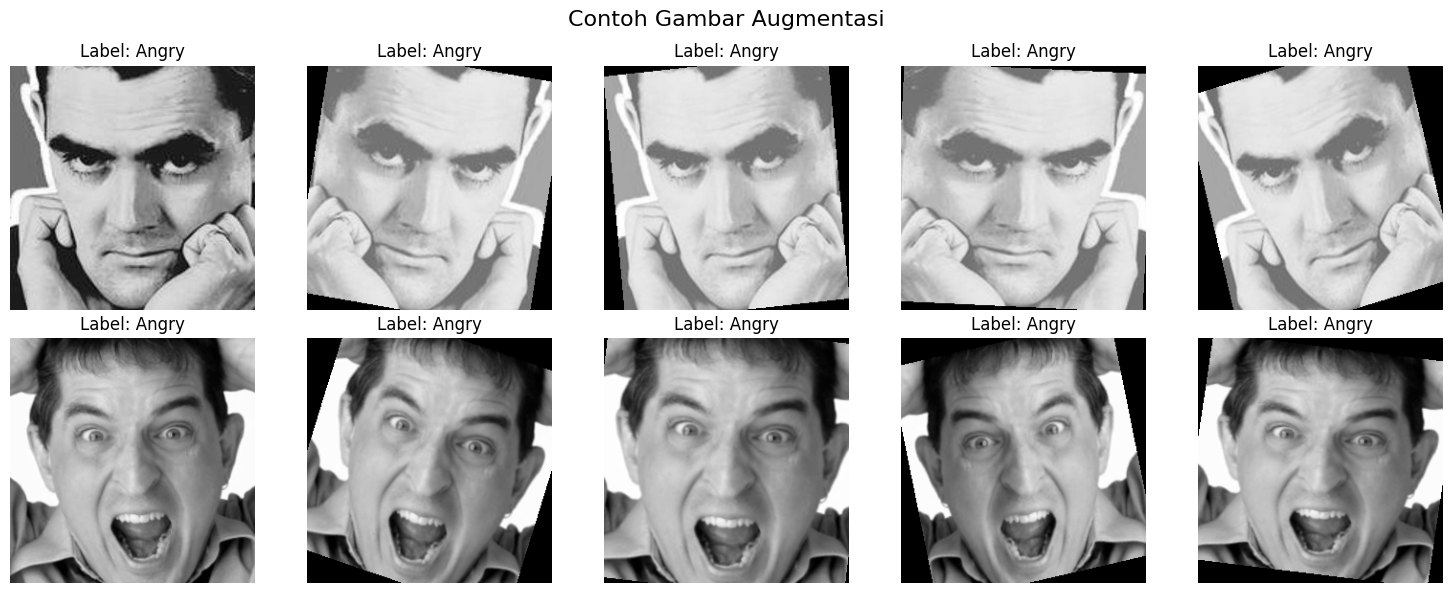

In [10]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle("Contoh Gambar Augmentasi", fontsize=16)

for i in range(10):
    ax = axes[i // 5, i % 5]
    ax.imshow(augmented_images[i].squeeze(), cmap='gray')
    ax.set_title(f"Label: {augmented_labels[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

# import matplotlib.pyplot as plt

# fig, axes = plt.subplots(2, 5, figsize=(15, 6))
# fig.suptitle("Contoh Gambar Augmentasi", fontsize=16)

# for i in range(10):
#     ax = axes[i // 5, i % 5]
#     # X_aug[i] shape: (H, W, 1), jadi kita squeeze untuk jadi (H, W)
#     ax.imshow(X_aug[i].squeeze(), cmap='gray')
#     ax.set_title(f"Label: {y_aug[i]}")
#     ax.axis('off')

# plt.tight_layout()
# plt.show()

`Hasil menunjukan untuk augmentasi yang dipake mengunakan augmentasi pake library `

### Normalisasi 

In [11]:
import numpy as np

normalized_images = []

for img in augmented_images:
    img_array = np.array(img).astype(np.float32)
    img_array /= 255.0  
    normalized_images.append(img_array)

print("Contoh min/max pixel value setelah normalisasi:")
for i in range(3):
    print(f"- Gambar {i+1}: min={normalized_images[i].min():.3f}, max={normalized_images[i].max():.3f}")


Contoh min/max pixel value setelah normalisasi:
- Gambar 1: min=0.384, max=1.000
- Gambar 2: min=0.000, max=0.996
- Gambar 3: min=0.000, max=0.996


`Menampilkan hasil array greyscale, Augementasi, dan normalisasi`

In [153]:
print(len(normalized_images))

2040


In [20]:
min_len = min(len(labels), len(gray_data), len(augmented_data), len(segmented_normalized_data))

labels = labels[:min_len]
gray_data = gray_data[:min_len]
augmented_data = augmented_data[:min_len]
segmented_normalized_data = segmented_normalized_data[:min_len]

df = pd.DataFrame({
    'label': labels,
    'gray': gray_data,
    'augmented': augmented_data,
    'segmented_normalized': segmented_normalized_data
})
df

,label,gray,augmented,segmented_normalized
0,Angry,"[166.0, 166.0, 166.0, 166.0, 166.0, 166.0, 166...","[166.0, 166.0, 166.0, 166.0, 166.0, 166.0, 166...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Angry,"[246.0, 246.0, 246.0, 246.0, 246.0, 246.0, 246...","[166.0, 166.0, 166.0, 166.0, 166.0, 166.0, 166...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Angry,"[246.0, 246.0, 246.0, 246.0, 246.0, 246.0, 246...","[166.0, 166.0, 166.0, 166.0, 166.0, 166.0, 166...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Angry,"[255.0, 255.0, 255.0, 255.0, 254.0, 254.0, 254...","[166.0, 166.0, 166.0, 166.0, 166.0, 166.0, 166...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Angry,"[225.0, 227.0, 227.0, 227.0, 225.0, 222.0, 223...","[166.0, 166.0, 166.0, 166.0, 166.0, 166.0, 166...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...
214,Sad,"[40.0, 37.0, 37.0, 47.0, 71.0, 70.0, 49.0, 40....","[136.0, 139.0, 141.0, 142.0, 139.0, 137.0, 134...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ..."
215,Sad,"[230.0, 230.0, 230.0, 231.0, 231.0, 232.0, 233...","[88.0, 93.0, 96.0, 98.0, 103.0, 106.0, 107.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
216,Sad,"[143.0, 144.0, 144.0, 144.0, 143.0, 142.0, 147...","[94.0, 95.0, 98.0, 105.0, 112.0, 118.0, 120.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
217,Sad,"[98.0, 93.0, 90.0, 83.0, 71.0, 88.0, 76.0, 88....","[81.0, 81.0, 81.0, 81.0, 81.0, 76.0, 76.0, 80....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


### Fitur ektraksi

In [12]:
import pywt
import pandas as pd
X_features = []

for img in normalized_images:
    img_array = img.squeeze() 
    coeffs = pywt.wavedec2(img_array, wavelet='haar', level=3)
    features = []
    cA3 = coeffs[0]
    features.append(cA3.flatten())
    for detail_level in coeffs[1:]: 
        for arr in detail_level:
            features.append(arr.flatten())

    feature_vector = np.hstack(features)
    X_features.append(feature_vector)
X_features = np.array(X_features)
df_features = pd.DataFrame(X_features)
print(df_features)

         0         1         2         3         4         5         6      \
0     5.203431  5.188235  7.170588  5.034313  3.661274  6.239705  7.116666   
1     0.000000  0.000000  0.898529  3.646078  3.747549  3.579412  3.621078   
2     0.000000  0.000000  0.000000  0.000000  0.000000  0.667647  1.430882   
3     2.314215  3.870098  4.035784  3.722548  3.603921  3.697549  4.856862   
4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
2545  2.666667  2.666667  2.666667  2.669608  2.325980  1.530392  1.637255   
2546  0.000000  0.126471  0.240196  0.235294  0.203431  0.225000  0.216176   
2547  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2548  0.144608  0.302941  0.406372  0.356863  0.300000  0.279412  0.228431   
2549  1.272059  1.627451  1.431863  0.937745  0.998039  1.129412  0.750000   

         7         8         9      ...     65526     65527    

### PCA optimal

In [ ]:
pca = PCA()
pca.fit(X_features)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

threshold = 0.95
n_components_optimal = np.argmax(cumulative_variance >= threshold) + 1

print(f"Jumlah komponen PCA optimal untuk menjelaskan {threshold*100}% varians adalah: {n_components_optimal}")

Jumlah komponen PCA optimal untuk menjelaskan 95.0% varians adalah: 384


### PCA

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
X_features1 = pca.fit_transform(X_features)

In [18]:
X_features1

array([[ 75.331     ,  10.653114  ,  -7.183275  , ...,   0.28948614,
          2.169186  ,   0.93613434],
       [ 58.965633  , -12.19377   ,  -8.370704  , ...,  -0.88977844,
         -3.153741  ,  -1.2736241 ],
       [ 58.71516   , -24.468166  ,   2.2870367 , ...,  -1.1233839 ,
         -0.14494841,  -0.7971132 ],
       ...,
       [-12.02124   ,   1.7873665 ,  -3.2793975 , ...,  -0.9760043 ,
         -1.786345  ,  -3.8086662 ],
       [-14.8860855 ,  -7.372342  ,   6.3412004 , ...,  -2.8567455 ,
          2.4443626 ,  -0.7791875 ],
       [-14.707943  ,  -8.082752  ,   8.244691  , ...,  -1.4810163 ,
         -1.4230201 ,   0.86192465]], dtype=float32)

### Label & split data

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(augmented_labels)  
X_train, X_test, y_train, y_test = train_test_split(X_features1, y_encoded, test_size=0.2, random_state=42)


In [21]:
print(len(X_features)) 
print(len(y_encoded))

2550
2550


In [22]:
print(len(X_train))
print(len(X_test))

2040
510


### Tuning parameter

In [213]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Definisikan model dasar
model2 = SVC(kernel='rbf', probability=True)

# Definisikan grid parameter yang akan dicoba
param_grid = {
    'C': [0.1, 1, 10, 100],          # C dari kecil ke besar
    'gamma': ['scale', 0.001, 0.01, 0.1, 1]  # gamma dengan beberapa nilai
}

# Setup GridSearchCV dengan 5-fold cross-validation
grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Jalankan pencarian grid pada data training
grid_search.fit(X_train, y_train)

# Cetak hasil terbaik
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Model terbaik
best_model = grid_search.best_estimator_

# Evaluasi pada data test
test_accuracy = best_model.score(X_test, y_test)
print("Test accuracy with best model:", test_accuracy)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found: {'C': 10, 'gamma': 'scale'}
Best cross-validation accuracy: 0.7740196078431373
Test accuracy with best model: 0.7803921568627451


### Akurasi model

In [23]:
# Buat dan latih model SVM
model = SVC(kernel='rbf', C=10, gamma='scale', probability=True)  
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\n=== Hasil Evaluasi ===")
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


=== Hasil Evaluasi ===
Akurasi: 0.8

Classification Report:
              precision    recall  f1-score   support

       Angry       0.82      0.78      0.80       151
       Happy       0.78      0.85      0.81       217
         Sad       0.82      0.75      0.78       142

    accuracy                           0.80       510
   macro avg       0.80      0.79      0.80       510
weighted avg       0.80      0.80      0.80       510



In [27]:
import numpy as np

# Buat DataFrame per-baris
df_eval = pd.DataFrame({
    'y_true': le.inverse_transform(y_test),
    'y_pred': le.inverse_transform(y_pred)
})
df_eval['correct'] = df_eval['y_true'] == df_eval['y_pred']

# Hitung jumlah prediksi BENAR per kelas
correct_counts = df_eval[df_eval['correct']].groupby('y_true').size().reindex(le.classes_, fill_value=0)
print(correct_counts)

y_true
Angry    118
Happy    184
Sad      106
dtype: int64


### Evaluasi 

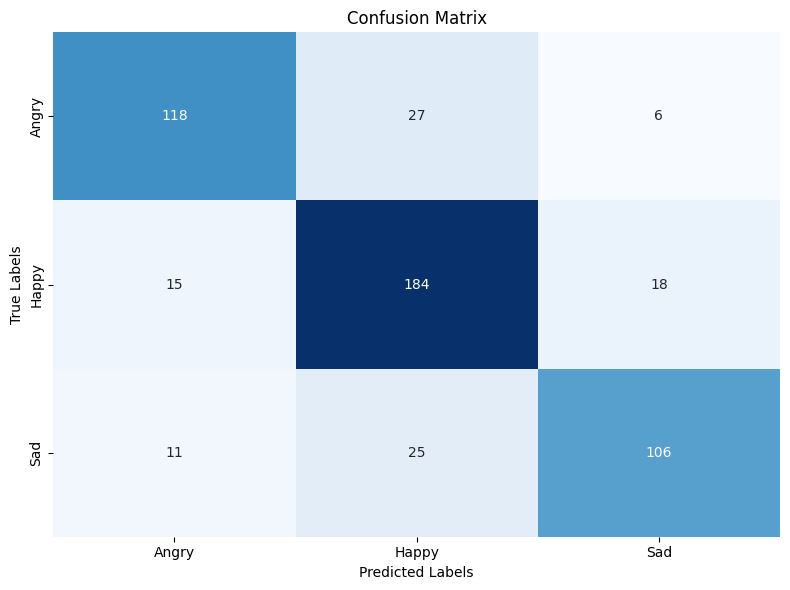

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

# === Confusion Matrix tanpa garis tepi ===
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_,
            linewidths=0, linecolor=None, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

### Percobaan pertama

In [221]:
import joblib
# joblib.dump(model, 'svm_model.pkl')

# # Simpan model PCA
# joblib.dump(pca, 'pca_model.pkl')
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']

In [223]:
svm_model = joblib.load('svm_model.pkl')
pca = joblib.load('pca_model.pkl')
label_encoder = joblib.load('label_encoder.pkl')

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def extract_dwt_features(img_gray):
    coeffs = pywt.wavedec2(img_gray, wavelet='haar', level=3)
    features = []
    cA3 = coeffs[0]
    features.append(cA3.flatten())
    for detail_level in coeffs[1:]:
        for arr in detail_level:
            features.append(arr.flatten())
    feature_vector = np.hstack(features)
    return feature_vector

def preprocess_and_predict(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Gambar tidak ditemukan atau path salah")

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    if len(faces) == 0:
        raise ValueError("Tidak ditemukan wajah pada gambar")

    x, y, w, h = faces[0]
    face_img = gray[y:y+h, x:x+w]

    # Resize ke ukuran yang sesuai (misal 256x256)
    face_resized = cv2.resize(face_img, (256, 256))

    # Normalisasi pixel ke rentang 0-1
    face_normalized = face_resized.astype('float32') / 255.0

    # Ekstraksi fitur DWT
    features = extract_dwt_features(face_normalized)

    # PCA transformasi
    features_pca = pca.transform(features.reshape(1, -1))

    # Prediksi SVM (hasil numerik)
    prediction_num = svm_model.predict(features_pca)
    prediction_proba = svm_model.predict_proba(features_pca)

    # Konversi hasil prediksi ke label asli
    prediction_label = label_encoder.inverse_transform(prediction_num)

    return prediction_label[0], prediction_proba[0]

# Contoh penggunaan
image_path = r'C:\project_smt 4\PCD\face emotion\th (1).jpg'
try:
    label_pred, prob_pred = preprocess_and_predict(image_path)
    print(f"Prediksi label: {label_pred}")
    print(f"Probabilitas prediksi: {prob_pred}")
except Exception as e:
    print(f"Error: {e}")

Prediksi label: Sad
Probabilitas prediksi: [0.21569946 0.12166216 0.66263837]


In [ ]:
import cv2
import numpy as np
import pywt
import joblib

# Muat model SVM, PCA, dan Label Encoder
svm_model = joblib.load('svm_model.pkl')
pca = joblib.load('pca_model.pkl')
label_encoder = joblib.load('label_encoder.pkl')

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def extract_dwt_features(img_gray):
    coeffs = pywt.wavedec2(img_gray, wavelet='haar', level=3)
    features = []
    cA3 = coeffs[0]
    features.append(cA3.flatten())
    for detail_level in coeffs[1:]:
        for arr in detail_level:
            features.append(arr.flatten())
    feature_vector = np.hstack(features)
    return feature_vector

def crop_face_with_margin(gray_img, x, y, w, h, margin=0.1):
    height, width = gray_img.shape
    x_margin = int(w * margin)
    y_margin = int(h * margin)

    x1 = max(x - x_margin, 0)
    y1 = max(y - y_margin, 0)
    x2 = min(x + w + x_margin, width)
    y2 = min(y + h + y_margin, height)

    face_cropped = gray_img[y1:y2, x1:x2]
    return face_cropped

def preprocess_and_predict_all_faces(image_path, margin=2):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Gambar tidak ditemukan atau path salah")

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    if len(faces) == 0:
        raise ValueError("Tidak ditemukan wajah pada gambar")

    results = []
    for (x, y, w, h) in faces:
        face_img = crop_face_with_margin(gray, x, y, w, h, margin=margin)

        # Resize ke ukuran yang sesuai (misal 256x256)
        face_resized = cv2.resize(face_img, (256, 256))

        # Normalisasi pixel ke rentang 0-1
        face_normalized = face_resized.astype('float32') / 255.0

        # Ekstraksi fitur DWT
        features = extract_dwt_features(face_normalized)

        # PCA transformasi
        features_pca = pca.transform(features.reshape(1, -1))

        # Prediksi SVM (hasil numerik)
        prediction_num = svm_model.predict(features_pca)
        prediction_proba = svm_model.predict_proba(features_pca)

        # Konversi hasil prediksi ke label asli
        prediction_label = label_encoder.inverse_transform(prediction_num)

        results.append({
            'coords': (x, y, w, h),
            'label': prediction_label[0],
            'proba': prediction_proba[0]
        })

    return image, results

def annotate_and_save_all_faces(image, results, output_path='prediction_result_all_faces.png'):
    annotated_img = image.copy()
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.7
    thickness = 2

    for res in results:
        x, y, w, h = res['coords']
        label = res['label']
        proba = res['proba']

        # Gambar kotak wajah
        cv2.rectangle(annotated_img, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Teks label dan probabilitas
        text = f"{label}: {proba.max()*100:.2f}%"
        text_size, _ = cv2.getTextSize(text, font, font_scale, thickness)
        text_w, text_h = text_size

        # Background untuk teks
        cv2.rectangle(annotated_img, (x, y - text_h - 10), (x + text_w, y), (0, 255, 0), -1)

        # Tulis teks di atas kotak wajah
        cv2.putText(annotated_img, text, (x, y - 5), font, font_scale, (0, 0, 0), thickness)

    # Simpan gambar beranotasi
    cv2.imwrite(output_path, annotated_img)

    # Tampilkan gambar (gunakan OpenCV window)
    cv2.imshow('Prediction Result - All Faces', annotated_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Contoh penggunaan
image_path = r'C:\project_smt 4\PCD\face emotion\th (1).jpg'
try:
    img, prediction_results = preprocess_and_predict_all_faces(image_path, margin=0.1)
    for idx, res in enumerate(prediction_results):
        print(f"Wajah ke-{idx+1}: Label = {res['label']}, Probabilitas = {res['proba'].max()*100:.2f}%")
    annotate_and_save_all_faces(img, prediction_results)
except Exception as e:
    print(f"Error: {e}")


Wajah ke-1: Label = Sad, Probabilitas = 47.39%
Wajah ke-2: Label = Sad, Probabilitas = 61.42%
Wajah ke-3: Label = Happy, Probabilitas = 65.27%
Wajah ke-4: Label = Angry, Probabilitas = 47.19%


Wajah ke-1:
Prediksi label: Sad
Probabilitas prediksi: [0.1783953  0.34771852 0.47388618]

Wajah ke-2:
Prediksi label: Sad
Probabilitas prediksi: [0.19695589 0.18879943 0.61424468]

Wajah ke-3:
Prediksi label: Happy
Probabilitas prediksi: [0.18666839 0.65272433 0.16060729]

Wajah ke-4:
Prediksi label: Angry
Probabilitas prediksi: [0.47191329 0.34260106 0.18548566]

None


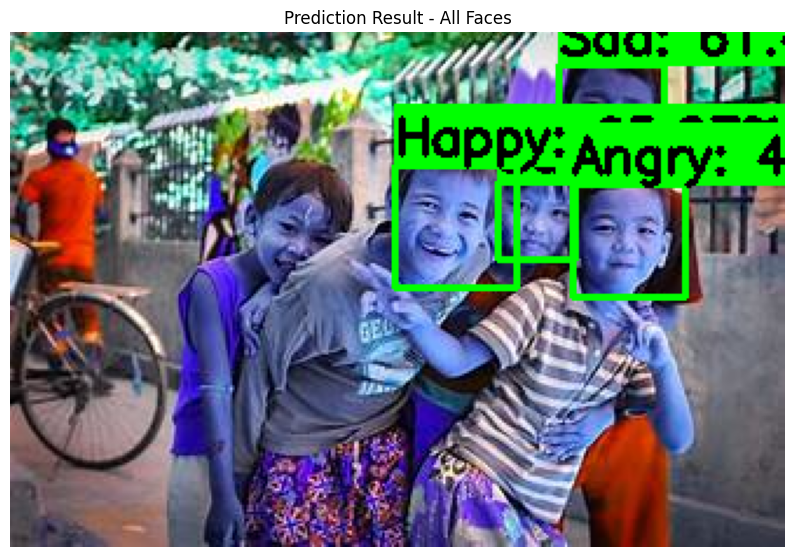

In [ ]:
import cv2
import numpy as np
import pywt
import joblib

# Muat model SVM, PCA, dan Label Encoder
svm_model = joblib.load('svm_model.pkl')
pca = joblib.load('pca_model.pkl')
label_encoder = joblib.load('label_encoder.pkl')

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def extract_dwt_features(img_gray):
    coeffs = pywt.wavedec2(img_gray, wavelet='haar', level=3)
    features = []
    cA3 = coeffs[0]
    features.append(cA3.flatten())
    for detail_level in coeffs[1:]:
        for arr in detail_level:
            features.append(arr.flatten())
    feature_vector = np.hstack(features)
    return feature_vector

def crop_face_with_margin(gray_img, x, y, w, h, margin=0.1):
    height, width = gray_img.shape
    x_margin = int(w * margin)
    y_margin = int(h * margin)

    x1 = max(x - x_margin, 0)
    y1 = max(y - y_margin, 0)
    x2 = min(x + w + x_margin, width)
    y2 = min(y + h + y_margin, height)

    face_cropped = gray_img[y1:y2, x1:x2]
    return face_cropped

def preprocess_and_predict_all_faces(image_path, margin=0.1):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Gambar tidak ditemukan atau path salah")

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    if len(faces) == 0:
        raise ValueError("Tidak ditemukan wajah pada gambar")

    results = []
    for (x, y, w, h) in faces:
        face_img = crop_face_with_margin(gray, x, y, w, h, margin=margin)
        face_resized = cv2.resize(face_img, (256, 256))

        face_normalized = face_resized.astype('float32') / 255.0

        features = extract_dwt_features(face_normalized)

        features_pca = pca.transform(features.reshape(1, -1))
        prediction_num = svm_model.predict(features_pca)
        prediction_proba = svm_model.predict_proba(features_pca)
        prediction_label = label_encoder.inverse_transform(prediction_num)

        results.append({
            'coords': (x, y, w, h),
            'label': prediction_label[0],
            'proba': prediction_proba[0]
        })

    return image, results

def print_predictions(results):
    for idx, res in enumerate(results):
        print(f"Wajah ke-{idx+1}:")
        print(f"Prediksi label: {res['label']}")
        print(f"Probabilitas prediksi: {res['proba']}\n")

def annotate_and_show_all_faces(image, results):
    annotated_img = image.copy()
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.7
    thickness = 2

    for res in results:
        x, y, w, h = res['coords']
        label = res['label']
        proba = res['proba']

        # Gambar kotak wajah
        cv2.rectangle(annotated_img, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Teks label dan probabilitas
        text = f"{label}: {proba.max()*100:.2f}%"
        text_size, _ = cv2.getTextSize(text, font, font_scale, thickness)
        text_w, text_h = text_size

        # Background untuk teks
        cv2.rectangle(annotated_img, (x, y - text_h - 10), (x + text_w, y), (0, 255, 0), -1)

        # Tulis teks di atas kotak wajah
        cv2.putText(annotated_img, text, (x, y - 5), font, font_scale, (0, 0, 0), thickness)

    plt.figure(figsize=(10, 8))
    plt.imshow(annotated_img)
    plt.axis('off')  
    plt.title('Prediction Result - All Faces')
    plt.show()
image_path = r'C:\project_smt 4\PCD\face emotion\th (1).jpg'
try:
    img, prediction_results = preprocess_and_predict_all_faces(image_path, margin=0.1)
    
    result=print_predictions(prediction_results)
    print(result)
    annotate_and_show_all_faces(img, prediction_results)

except Exception as e:
    print(f"Error: {e}")


Tekan 'q' untuk keluar dari kamera
